# Local Outlier Factor (LOF)

Algoritma Local Outlier Factor (LOF) adalah metode deteksi anomali tanpa pengawasan yang menghitung deviasi kepadatan lokal dari suatu titik data terhadap tetangganya. LOF mengidentifikasi sampel sebagai outlier jika kepadatannya jauh lebih rendah dibandingkan dengan tetangga sekitarnya. Contoh ini menunjukkan cara menggunakan LOF untuk deteksi outlier, yang merupakan kasus penggunaan default dari estimator ini di scikit-learn. Perlu dicatat bahwa saat LOF digunakan untuk deteksi outlier, algoritma ini tidak memiliki metode predict, decision_function, dan score_samples. Untuk memahami perbedaan antara deteksi outlier dan deteksi kebaruan (novelty detection), serta bagaimana menggunakan LOF untuk deteksi kebaruan, lihat User Guide. Jumlah tetangga yang dipertimbangkan (parameter n_neighbors) umumnya ditetapkan lebih besar dari jumlah minimum sampel yang harus dimiliki suatu kluster agar sampel lain dapat dianggap sebagai outlier lokal relatif terhadap kluster tersebut, tetapi lebih kecil dari jumlah maksimum sampel terdekat yang berpotensi menjadi outlier lokal. Dalam praktiknya, informasi ini sering kali tidak tersedia, dan memilih n_neighbors = 20 umumnya memberikan hasil yang baik.


## Generate data with outliers

In [7]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

## Fit the model for outlier detection (default)

In [8]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

## Plot results

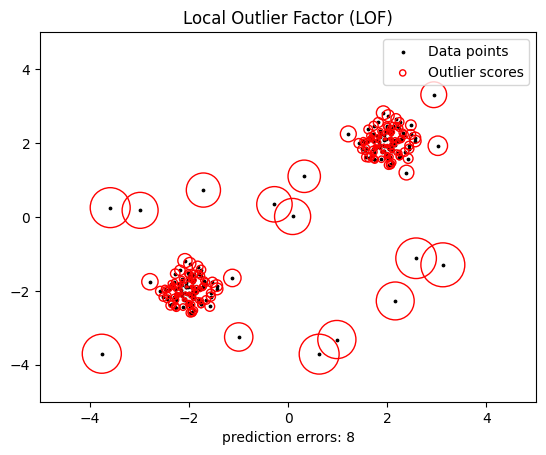

In [9]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

# Perhitungan statis manual


| Data | x  | y  |
|------|----|----|
| 1    | 3  | 5  |
| 2    | 4  | 7  |
| 3    | 2  | 3  |
| 4    | 5  | 4  |
| 5    | 3  | 3  |
| 6    | 6  | 2  |
| 7    | 7  | 5  |
| 8    | 5  | 6  |
| 9    | 3  | 6  |
| 10   | 14 | 18 |


#### tabel perhitungan **jarak Euclidean** berdasarkan gambar yang kamu berikan:

| Titik | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   |
|-------|------|------|------|------|------|------|------|------|------|------|
| 1     | 0    | 2.236 | 2.236 | 2.236 | 2    | 4.243 | 4    | 2.236 | 1    | 17.029 |
| 2     | 2.236 | -    | 4.472 | 3.162 | 4.123 | 5.385 | 3.606 | 1.414 | 1.414 | 14.866 |
| 3     | 2.236 | 4.472 | -    | 3.162 | 1    | 4.123 | 5.385 | 4.243 | 3.162 | 19.209 |
| 4     | 2.236 | 3.162 | 3.162 | -    | 2.236 | 2.236 | 2.236 | 2    | 2.828 | 16.643 |
| 5     | 2    | 4.123 | 1    | 2.236 | -    | 3.162 | 4.472 | 3.606 | 3    | 18.601 |
| 6     | 4.243 | 5.385 | 4.123 | 2.236 | 3.162 | -    | 3.162 | 4.123 | 5    | 17.889 |
| 7     | 4    | 3.606 | 5.385 | 2.236 | 4.472 | 3.162 | -    | 2.236 | 4.123 | 14.765 |
| 8     | 2.236 | 1.414 | 4.243 | 2    | 3.606 | 4.123 | 2.236 | -    | 2    | 15    |
| 9     | 1    | 1.414 | 3.162 | 2.828 | 3    | 5    | 4.123 | 2    | -    | 16.279 |
| 10    | 17.029 | 14.866 | 19.209 | 16.643 | 18.601 | 17.889 | 14.765 | 15    | 16.279 | -    |

#### Tabel **Reachability Distance (K = 3)** 

| Titik | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | 10     |
|-------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| 1     |        |        |        |        | 2.236  |        |        | 2.236  | 2      |        | 
| 2     | 2.236  |        |        |        |        |        |        | 2      | 2      |        | 
| 3     | 2.236  |        |        | 3.162  | 2.236  |        |        |        |        |        |
| 4     |        |        |        |        | 2.236  |        | 3.162  |2       |        |        |
| 5     | 2.236  |        | 3.162  | 2.236  |        |        |        |        |        |        |
| 6     |        |        |        | 2.236  | 3.162  |        | 3.162  |        |        |        |
| 7     |        |        |        | 2.236  |        | 3.162  |        | 2.236  |        |        |
| 8     |        |        | 2.236  | 2.236  |        |        |        |        | 2      |        |
| 9     | 2.236  | 2.236  |        |        |        |        |        | 2      |        |        | 
| 10    |        | 14.866 |        |        |        |        | 14.764 | 15     |        |        |


#### tabel **Menghitung LRD** 

| Titik  | LRD             | 3 Tetangga Terdekat |
|--------|---------------|--------------------|
| LRD(1)  | 0.463525492   | (9,5,8)           |
| LRD(2)  | 0.48107237    | (8,9,1)           |
| LRD(3)  | 0.392957488   | (5,1,4)           |
| LRD(4)  | 0.405496059   | (8,5,7)           |
| LRD(5)  | 0.392957488   | (3,1,4)           |
| LRD(6)  | 0.350441772   | (4,5,7)           |
| LRD(7)  | 0.392957488   | (4,8,6)           |
| LRD(8)  | 0.463525492   | (3,4,9)           |
| LRD(9)  | 0.463525492   | (1,2,8)           |
| LRD(10) | 0.067218016   | (7,2,8)           |

## Table LOF


$
\begin{array}{|c|c|}
    \hline
    \textbf{Titik} & \textbf{LOF} \\
    \hline
    1 & 0.9493 \\\hline
    2 & 0.9635 \\\hline
    3 & 1.0705 \\\hline
    4 & 1.0271 \\\hline
    5 & 1.0374 \\\hline
    6 & 1.1332 \\\hline
    7 & 1.0344 \\\hline
    8 & 0.9075 \\\hline
    9 & 1.0126 \\\hline
    10 & 6.6329 \\
    \hline
\end{array}
$


In [10]:
%pip install pymysql pandas psycopg2 sqlalchemy seaborn numpy pandas scikit-learn pyod matplotlib seaborn python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

data = np.array([
    [3, 5],
    [4, 7],
    [2, 3],
    [5, 4],
    [3, 3],
    [6, 2],
    [7, 5],
    [5, 6],
    [3, 6],
    [14, 18]
])

clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_pred = clf.fit_predict(data)
# n_errors = (y_pred != ground_truth).sum()
X_scores = -clf.negative_outlier_factor_

for i in X_scores:
  print(i)

print(y_pred)

1.0270880488169942
0.9233171042905761
1.0704966620322989
0.907522212620221
1.0704966620322989
1.188443242610531
1.083656453869045
1.01261842015087
0.9708879339047151
6.632920900063053
[ 1  1  1  1  1  1  1  1  1 -1]


### Dari hasil perbandingan antara **perhitungan menggunakan kode** dan **hasil dari Excel/Manual**, dapat disimpulkan bahwa:   

- **LOF(k) ≈ 1** → Artinya titik tersebut memiliki kepadatan yang mirip dengan tetangganya, sehingga dianggap sebagai bagian dari kelompok (**inlier**).  
- **LOF(k) < 1** → Artinya titik ini memiliki kepadatan lebih tinggi dibandingkan tetangganya, termasuk **inlier** karena berada di area yang lebih rapat.  
- **LOF(k) > 1** → Artinya titik ini memiliki kepadatan lebih jarang dibandingkan dengan tetangganya. Semakin besar nilai LOF, semakin kuat indikasi bahwa titik tersebut adalah **outlier**.   

1. **Nilai LOF dari kode dan Excel hampir sama**, dengan selisih kecil yang mungkin disebabkan oleh perbedaan presisi dalam perhitungan.  
2. **Titik 10 tetap terdeteksi sebagai outlier** di kedua metode, dengan nilai LOF yang jauh lebih besar dari 1.  
3. **Titik lainnya memiliki LOF yang mendekati 1**, menunjukkan bahwa mereka termasuk dalam kelompok **inlier** di kedua hasil.  
4. **Perbedaan kecil dalam nilai LOF kemungkinan berasal dari perbedaan metode rounding atau floating-point precision** dalam perhitungan di kode dan Excel.  

Kesimpulannya, baik hasil dari **kode maupun Excel** memberikan deteksi **outlier yang konsisten**, sehingga metode yang digunakan dapat dianggap valid.